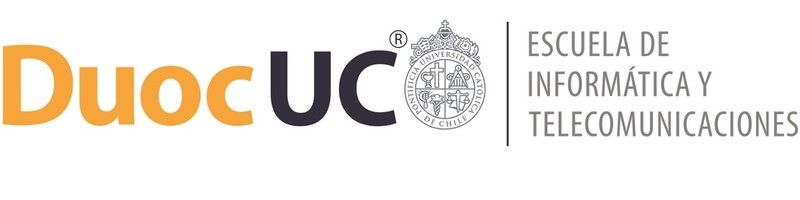

# Metodologia CRISP en Notebook
- Nombrede los integrantes del grupo
- evaluacion # X
- fecha entrega

## Fase 1: Business Understanding

---



CONTEXTO CASO

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela del icónico StarCraft original. El juego se ambienta en un futuro distante, donde tres facciones, los humanos terran, los enjambres zerg y los misteriosos protoss, luchan por el control del sector Koprulu.

- ......
- ......
- ......


<!-- 11 atributos descriptivos.
  1 etiqueta de [1: enfermedad cardíaca, 0: normal] -->


En este contexto, se presentan los siguientes datos:
- GameID: Unique ID for each game
- LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues
- .....
- .....


----------------------------------------------------------------------------------------

## Fase 2: Data Understanding

In [1]:
#código análisis estadísticos de cada columna, medidas de tendencia central, de segmentación, decribe(), tipos de datos,
#distribucion datos categoricos, distribucion datos numéricos, correlación entre columna,
#detección dupplicados, nulos, aoutliers

 - Explicación de observación (hallazgos). Todo respaldado con gráficos y elementos de análsis


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ruta del archivo CSV
file_path = "starcraft_duoc.csv"

# Cargar el archivo 
df = pd.read_csv(file_path, sep=';')

In [16]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936


### Dimensiones del dataset

In [19]:
print(f"Filas: {df.shape[0]} \nColumnas: {df.shape[1]}")

Filas: 3395 
Columnas: 20


### Tipos de datos y valores nulos / Titulo

In [6]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   object 
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   object 
 12  ActionLatency       3395 non-null   object 
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   object 
 16  Unique

In [7]:
# Cantidad de valores nulos por columna
print(df.isnull().sum())

GameID                 0
LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64


### Estadistica descriptiva

In [ ]:
# Estadísticas para todas las variables numéricas
df.describe()

### Correlaciones entre variables

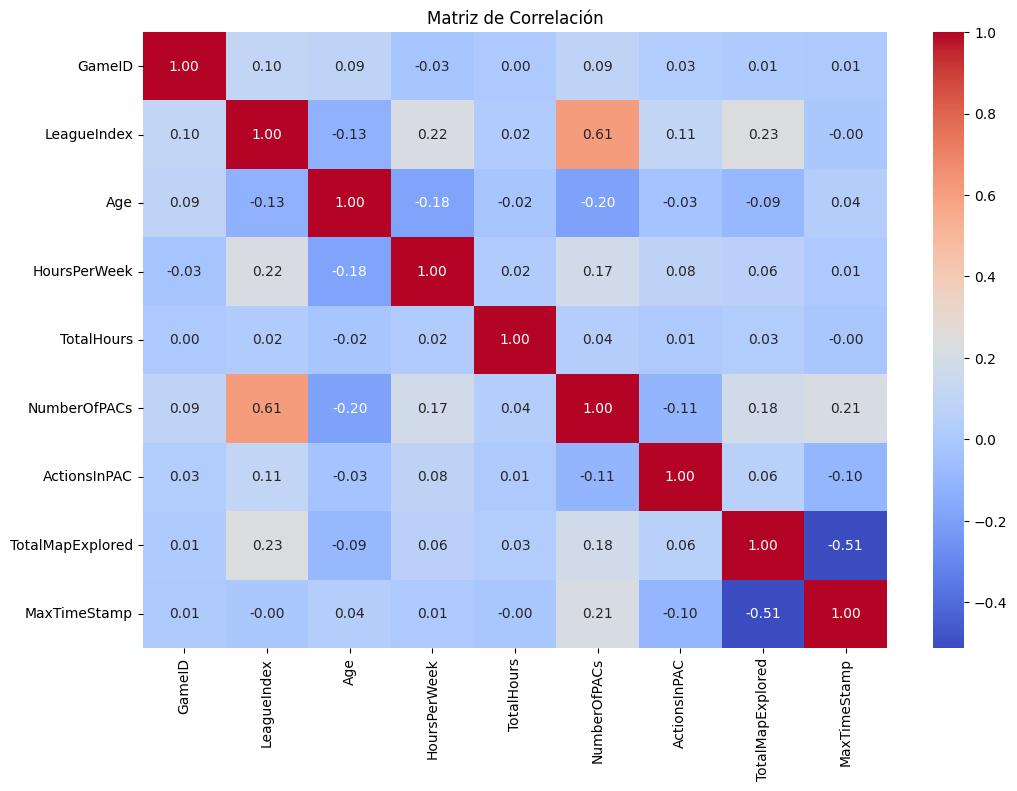

In [12]:
# Matriz de correlación
correlation = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#### Correlacion entre Edad y Liga

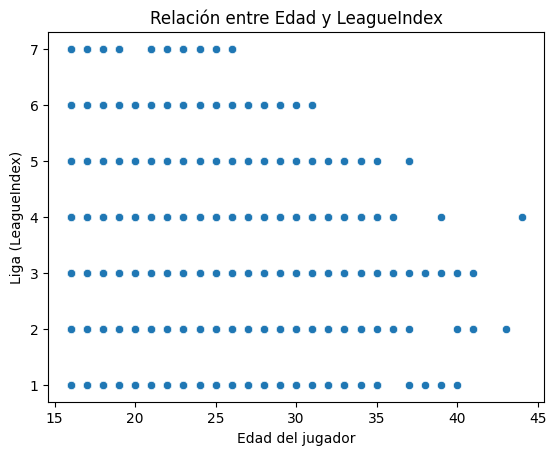

In [ ]:
sns.scatterplot(x="Age", y="LeagueIndex", data=df)
plt.title("Relación entre Edad y LeagueIndex")
plt.xlabel("Edad del jugador")
plt.ylabel("Liga (LeagueIndex)")
plt.show()


#### Correlacion NumberOfPACs y LeagueIndex

Esto sugiere que a mayor cantidad de PACs (Perception-Action Cycles, ciclos de percepción-acción), mayor tiende a ser la liga del jugador. Es decir, los jugadores más avanzados interactúan con mayor frecuencia y precisión durante el juego.

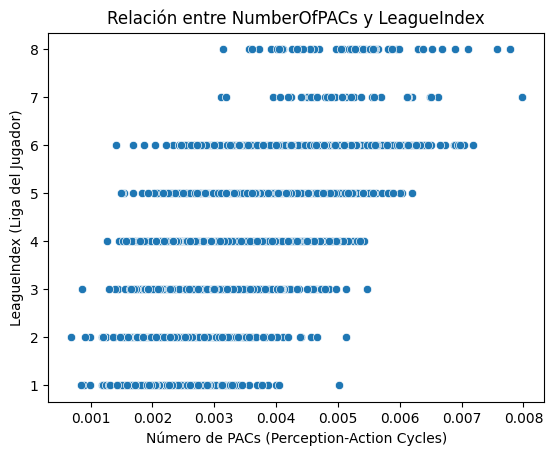

Correlación entre NumberOfPACs y LeagueIndex: 0.6122


In [28]:
# Gráfico de dispersión: NumberOfPACs vs LeagueIndex
sns.scatterplot(x="NumberOfPACs", y="LeagueIndex", data=df)
plt.title("Relación entre NumberOfPACs y LeagueIndex")
plt.xlabel("Número de PACs (Perception-Action Cycles)")
plt.ylabel("LeagueIndex (Liga del Jugador)")
plt.show()

# Correlación entre ambas variables
correlacion = df["NumberOfPACs"].corr(df["LeagueIndex"])
print(f"Correlación entre NumberOfPACs y LeagueIndex: {correlacion:.4f}")

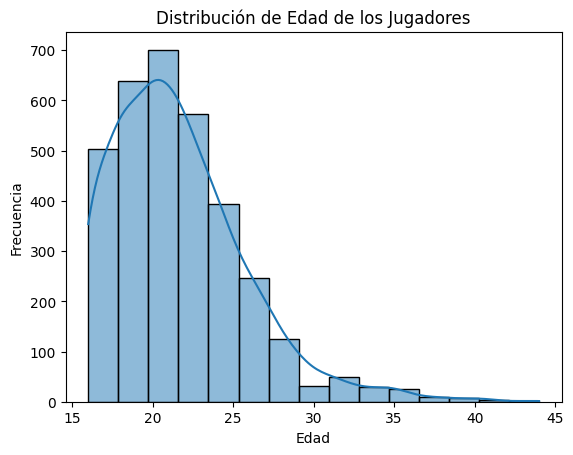

In [29]:
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Distribución de Edad de los Jugadores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Correlación entre TotalMapExplored y LeagueIndex: 0.2330


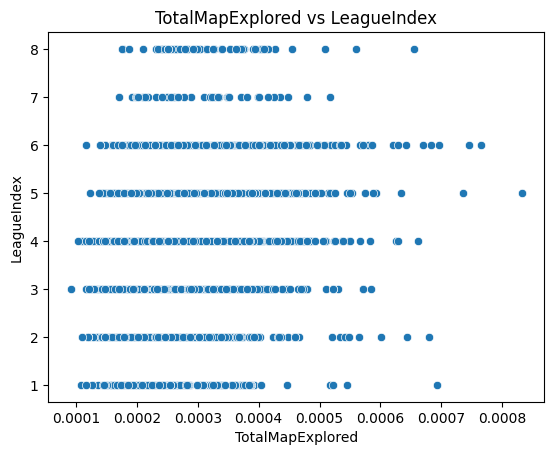

In [37]:
# Cambia estos nombres según la pareja que quieras analizar
var1 = "TotalMapExplored"
var2 = "LeagueIndex"

correlacion = df[var1].corr(df[var2])
print(f"Correlación entre {var1} y {var2}: {correlacion:.4f}")

# Y graficar:
sns.scatterplot(x=var1, y=var2, data=df)
plt.title(f"{var1} vs {var2}")
plt.show()



## Conclusiones Fase 2



- desarrollo de las conclusiones

## Fase 3: Data Preparation

In [ ]:
# Reemplazar puntos por nada y convertir a float en columnas numéricas mal formateadas Esto se deve hacer en esta fase
df["APM"] = df["APM"].str.replace(".", "", regex=False).astype(float)

## Fase 4: Modeling

### Aprendizaje Supervisado - Regresión

### Aprendizaje Supervisado - Clasificación



## Fase 5: Evaluation

### Aprendizaje Supervisado - Regresión

COMPARACION FINAL




### Aprendizaje Supervisado - Clasificacion



COMPARACION FINAL






CONCLUSION





### Aprendizaje NO Supervisado - Clustering



## Fase 6: Deployment